In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Taylorjeva vrsta

Zapišite Taylorjevo vrsto za funkcijo

$$ f(x)=\sin(x), $$

okoli točke $x_0=0$.

Zapišite funkcijo, ki predstavlja Taylorjev razvoj funkcijs $sin(x)$ okoli $x_0=0$ in jo narišite na istem grafu kot osnovno funkcijo.

Odvod funkcije $\sin(x)$ v točki $x_0=0$ je

$$f(0)=f^{(2n)}(0)=0$$
$$f^{(4n+1)}(0)=1$$
$$f^{(4n+3)}=-1$$

Taylorjev razvoj funkcije je torej

$$ \sin(x)=\sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}$$

In [2]:
def sinTaylor(x, nmax):
    ts = 0
    for n in range(nmax+1):
        ts = ts + (-1)**n * x**(2*n+1) / np.math.factorial(2*n+1)
    return ts

/tmp/ipykernel_4056/2559332004.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  ts = ts + (-1)**n * x**(2*n+1) / np.math.factorial(2*n+1)


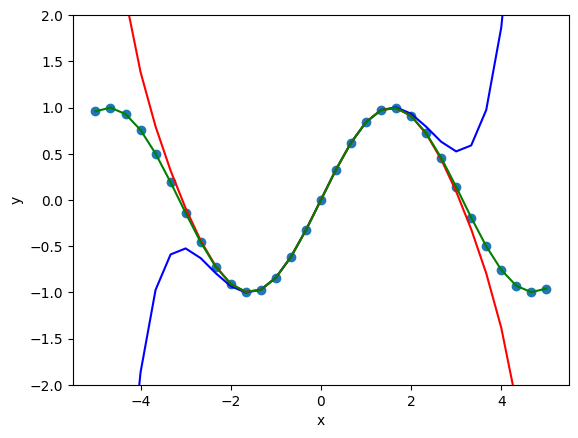

In [3]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,2])

x_list = np.linspace(-5,5,31)
plt.scatter(x_list, np.sin(x_list))

plt.plot(x_list, sinTaylor(x_list, 2), 'blue')
plt.plot(x_list, sinTaylor(x_list, 3), 'red')
plt.plot(x_list, sinTaylor(x_list, 10), 'green')

Naredite enako z uporabe splošne formule za Taylorjev razvoj iz kode v dokumentu Vaja1_interpolacija.ipynb.

In [4]:
# Funkcijo lahko prekopirate iz zvezka iz vaj.

def nDerivative(f, x, h, n):
    t = 0
    for k in range(n+1):
        t = t + (-1)**(k+n) * np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)) * f(x + k*h)
    return t / h**n

def taylor(f, x, x0, nmax, h):
    ts = 0
    for n in range(nmax+1):
        ts = ts + nDerivative(f, x0, h, n) * (x-x0)**n / np.math.factorial(n)
    return ts

/tmp/ipykernel_4056/2550613578.py:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  t = t + (-1)**(k+n) * np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)) * f(x + k*h)
/tmp/ipykernel_4056/2550613578.py:12: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  ts = ts + nDerivative(f, x0, h, n) * (x-x0)**n / np.math.factorial(n)


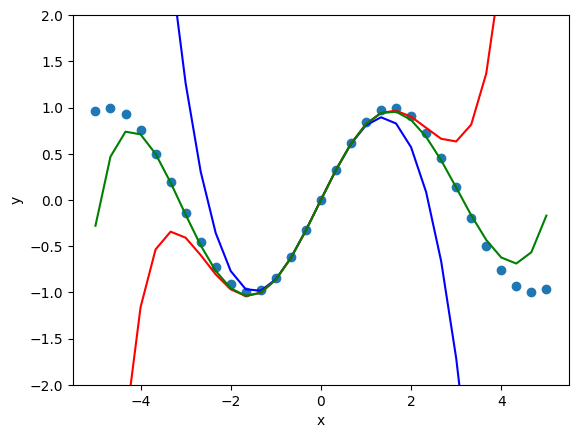

In [5]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,2])

x_list = np.linspace(-5,5,31)
plt.scatter(x_list, np.sin(x_list))

h = 0.05

plt.plot(x_list, taylor(np.sin, x_list, 0, 3, h), 'blue')
plt.plot(x_list, taylor(np.sin, x_list, 0, 5, h), 'red')
plt.plot(x_list, taylor(np.sin, x_list, 0, 10, h), 'green')

# 2. Gradient descent za razne funkcije

Naj bo modelska funkcija potenčna funkcija oblike

$$ f(x) = Ax^B. $$

Izpeljite gradient funkcije glede na parametre funkcije:

$$ (\partial_A f(x), \partial_B f(x)) $$

Uporabite spodnje podatke. Najdite optimalna parametre $A$, $B$ in $C$ modelske funkcije, da minimizirate SSE napako.

Za začetne podatke lahko uporabite $A=0.7,~B=1.3,~C=3.1$.

Narišite podatke in modelsko funkcijo z optimiziranimi parametri na istem grafu. Kaj opazite? Na kak način bi lahko rezultat izboljšali?

In [6]:
data = np.array([[-5.10235839e+00, -4.48831224e+00, -4.02635402e+00,
        -3.66541932e+00, -2.76755087e+00, -2.41173725e+00,
        -2.21798593e+00, -1.40846105e+00, -9.72921285e-01,
        -5.06576895e-01,  1.27353309e-01,  4.33866616e-01,
         8.50089211e-01,  1.69589942e+00,  2.06549662e+00,
         2.61385772e+00,  3.12433849e+00,  3.25139917e+00,
         3.85906393e+00,  4.58966477e+00,  5.20658445e+00],
       [-3.37978111e+01, -1.75851043e+01, -2.45631402e+00,
         3.95969395e+01,  1.34961877e+01,  7.70522396e+00,
        -2.79631639e+01, -3.03838405e+01,  4.22489176e+01,
         4.54731021e+01, -2.93947863e+01, -1.01656556e+01,
         3.38601570e+01, -2.40535912e+01, -1.98603340e+01,
         9.73869115e-01,  2.75401741e+00,  2.82050954e+01,
         9.41454784e+01,  2.21806036e+02,  4.44125946e+02]])

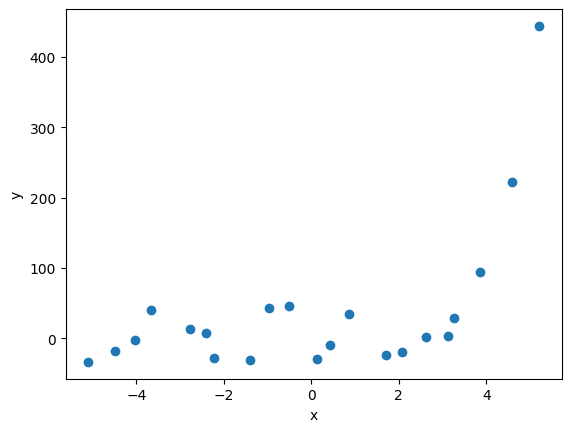

In [7]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[0], data[1])

In [8]:
def powerModel(x,A,B,C):
    return A*np.exp(B*x)+C

Izračunajmo gradiente:

$$\partial_A (A e^{Bx}+C) = e^{Bx},$$
$$\partial_B (A e^{Bx}+C) = Ax e^{Bx},$$
$$\partial_C (A e^{Bx}+C) = 1.$$

Kot izpeljano na vajah, velja:
$$\partial_{A,B,C}\Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \partial_{A,B,C}f(x_i). $$


In [9]:
def errorFitGradient(f, A, B, C, data):
    gradA = -2 * np.sum(np.array([(data[1,i] - f(data[0,i], A, B, C))*np.exp(B*data[0,1])  for i in range(len(data[0]))]))
    gradB = -2*np.sum(np.array([(data[1,i] - f(data[0,i], A, B, C))*data[0,i]*A*np.exp(B*data[0,1]) for i in range(len(data[0]))]))
    gradC = -2*np.sum(np.array([(data[1,i] - f(data[0,i], A, B, C)) for i in range(len(data[0]))]))
    return gradA, gradB, gradC

In [10]:
errorFitGradient(powerModel, 0.7, 1.3, 3.1, data)

(2.369928854685492, 5.599892721153029, 810.5117575230314)

In [11]:
iterations = 1000
h = 0.00001
A=0.7
B=1.3
C=3.1

for i in range(iterations):
    A1=A
    B1=B
    A = A - h * errorFitGradient(powerModel, A, B, C, data)[0]
    B = A1 - h * errorFitGradient(powerModel, A1, B, C, data)[1]
    C = C - h * errorFitGradient(powerModel, A1, B1, C, data)[2]

In [12]:
A, B, C

(0.9173839893023271, 0.9181010161993098, 11.652545080998816)

Narišimo rezultat

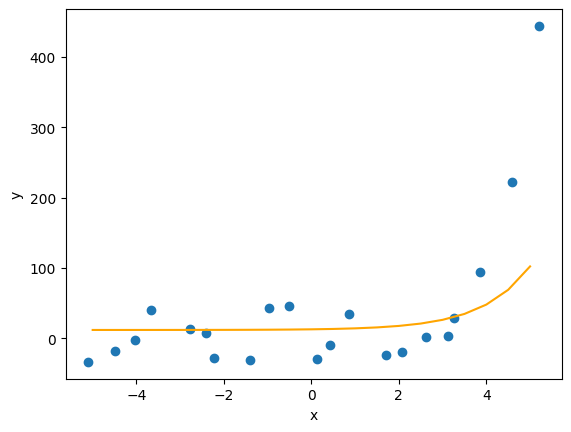

In [13]:
plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-5, 5, 21)
plt.plot(x_list, powerModel(x_list, A, B, C),'orange')
plt.scatter(data[0], data[1])

Opazka: Model deluje relativno slabo. Morda bi bilo smiselno bolj obtežiti točke ki so bolj oddaljene od izhodišča - drugačna "error funkcija".

Lahko uporabimo na primer funkcijo napake oblike (weighted SSE):

$$ \Delta = \sum_{i=1}^n w_i\left(y_i-f(x_i)\right)^2, $$

kjer je kot v primeru na vajah $f$ modelska funkcija, določena s koeficienti $a_i$, $(x_i, y_i)$ so podatki, katere želimo modelirati, $w_i$ pa so uteži posameznega podatka. V tem primeru želimo obtežiti podatke ki se pojavijo kasneje z dodatno utežjo, izberimo torej $w_i=i$:

$$ \Delta = \sum_{i=1}^n i\left(y_i-f(x_i)\right)^2. $$

Celotna izpeljava ostaja enaka, pri gradientih dodamo zgolj $i$, v vsakega od členov.

In [14]:
def errorFitGradient(f, A, B, C, data):
    gradA = -2*np.sum(np.array([(data[1,i] - f(data[0,i], A, B, C))*i*np.exp(B*data[0,1])  for i in range(len(data[0]))]))
    gradB = -2*np.sum(np.array([(data[1,i] - f(data[0,i], A, B, C))*i*data[0,i]*A*np.exp(B*data[0,1]) for i in range(len(data[0]))]))
    gradC = -2*np.sum(np.array([(data[1,i] - f(data[0,i], A, B, C))*i for i in range(len(data[0]))]))
    return gradA, gradB, gradC

In [15]:
iterations = 1000
h = 0.00001
A=0.7
B=1.3
C=3.1

for i in range(iterations):
    A1=A
    B1=B
    A = A - h * errorFitGradient(powerModel, A, B, C, data)[0]
    B = A1 - h * errorFitGradient(powerModel, A1, B, C, data)[1]
    C = C - h * errorFitGradient(powerModel, A1, B1, C, data)[2]

In [16]:
A, B, C

(1.0522708749966185, 1.0552995946387425, 23.724565503703857)

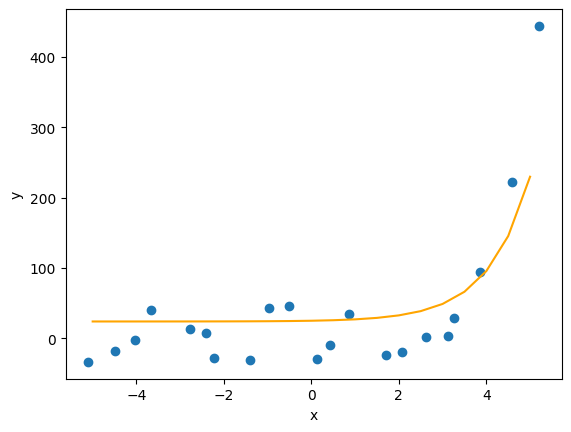

In [17]:
plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-5, 5, 21)
plt.plot(x_list, powerModel(x_list, A, B, C),'orange')
plt.scatter(data[0], data[1])

# 3. Fazni prostor in vizualizacija

Predstavljajte si hipotetičnim Word dokument z besedilom dolgim 10 strani pisave Courier New, velikosti 10px in razmikom med vrsticami 1. Narišite fazni diagram, kjer je na $x$ osi višina pisave, na $y$ osi razmik med vrsticami in na z osi število strani. (sanity check: število strani je diskretno).

Komentar: za besedilo lahko privzamete, da sestoji iz ene same črke, oziroma, da je širina črke konstantna. Marže papirja so lahko poljubne.


Število strani izračunamo po formuli

$$ št. strani = \frac{št.~črk}{(št.~črk/stran)},$$

kjer je

$$ št.~črk/stran = št.~črk/vrstico \times št.~vrstic. $$

Izračunamo oba faktorja

$$ št.~črk/vrstico = \frac{dolžina~vrstice}{dolžina~črke} = \frac{dolžina~vrstice}{dolžina~črke~(0)\times velikost~pisave},$$
$$ št.~vrstic = \frac{višina~strani}{višina~črke\times(1+LS)} = \frac{višina~strani}{višina~črke~(0)\times velikost~pisave \times (1+LS)},$$

kjer $višina~črke~(0)$ in $dolžina~črke~(0)$ predstavljata višino oziroma širino črke pri velikosti pisave 0 (tipično 1px). Predpostavljamo, da dimenziji črke rasteta linerano z velikostjo pisave. $LS$ je "line spacing", oziroma razmerje med višino praznega prostora med črkami in višino črk.

Izpeljemo formlulo za $št.~črk/stran$:

$$št.~črk/stran = \frac{dolžina~vrstice\times višina~strani}{dolžina~črke~(0)\times višina~črke~(0) \times velikost~pisave^2 \times (1+LS)},$$

velja torej

$$ št. strani = \frac{št.~črk\times dolžina~črke~(0)\times višina~črke~(0) \times velikost~pisave^2 \times (1+LS)}{dolžina~vrstice\times višina~strani}. $$

Preprost eksperiment z vhodnimi podatki (pisava Courier New, velikost 10px, line spacing 1) pokaže

$$ 1 = \frac{4575\times dolžina~črke~(0)\times višina~črke~(0) \times 100 \times 2}{dolžina~vrstice\times višina~strani}, $$

oziroma

$$ \frac{1}{2\times 100 \times 4575} = \frac{dolžina~črke~(0)\times višina~črke~(0)}{dolžina~vrstice\times višina~strani}, $$

kar pomeni

$$ št. strani = \frac{št.~črk \times velikost~pisave^2 \times (1+LS)}{2 \times 100 \times 4575}. $$

Za naš primer je $št.~črk = 45750$ (i.e. 10 strani), formula za število strani je torej

$$ št. strani = \frac{4575 \times velikost~pisave^2 \times (1+LS)}{2 \times 100 \times 4575}=\frac{velikost~pisave^2 \times (1+LS)}{20}. $$

Ker je število strani disktretno moramo končni rezultat zaokrožiti navzgor.


In [18]:
def no_pages(size, lb):
  return size**2*(1+lb)/20

Narišimo najprej zvezno funkcijo:

In [19]:
from mpl_toolkits.mplot3d import Axes3D

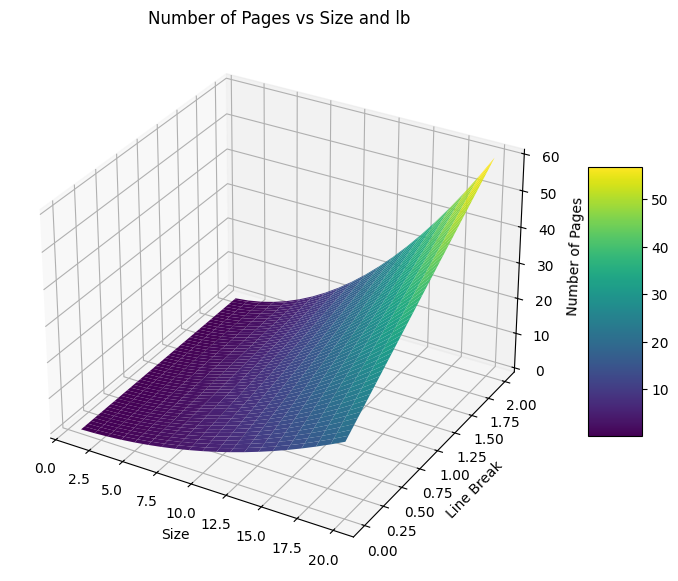

In [20]:
size_values = np.linspace(1, 20, 20)  
lb_values = np.linspace(0, 2, 100)
size_mesh, lb_mesh = np.meshgrid(size_values, lb_values)

no_pages_values = no_pages(size_mesh, lb_mesh)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(size_mesh, lb_mesh, no_pages_values, cmap='viridis')

ax.set_xlabel('Size')
ax.set_ylabel('Line Break')
ax.set_zlabel('Number of Pages')
ax.set_title('Number of Pages vs Size and lb')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()

In [21]:
def no_pages(size, lb):
  return np.ceil(size**2*(1+lb)/20)

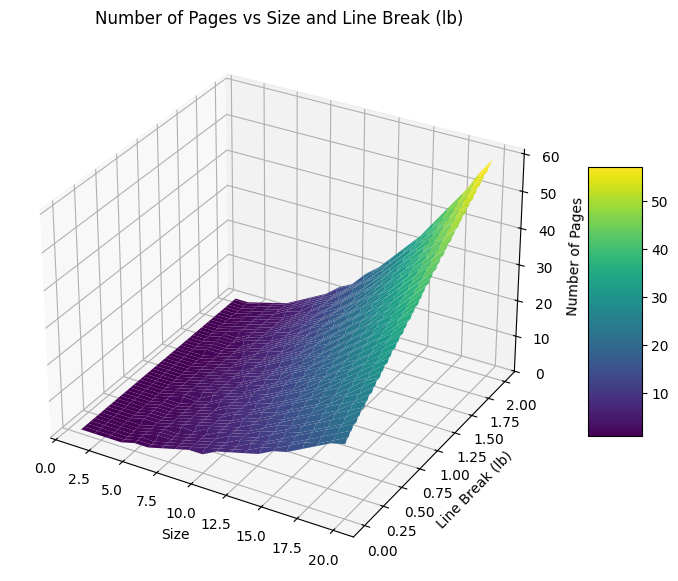

In [22]:
size_values = np.linspace(1, 20, 20)
lb_values = np.linspace(0, 2, 100)
size_mesh, lb_mesh = np.meshgrid(size_values, lb_values)

no_pages_values = no_pages(size_mesh, lb_mesh)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(size_mesh, lb_mesh, no_pages_values, cmap='viridis')

ax.set_xlabel('Size')
ax.set_ylabel('Line Break (lb)')
ax.set_zlabel('Number of Pages')
ax.set_title('Number of Pages vs Size and Line Break (lb)')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()

Let's zoom-in

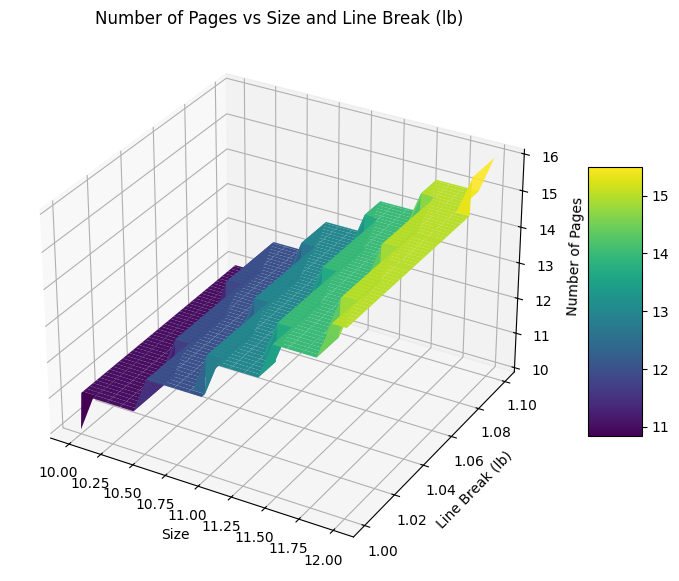

In [23]:
size_values = np.linspace(10, 12, 20)
lb_values = np.linspace(1, 1.1, 100)
size_mesh, lb_mesh = np.meshgrid(size_values, lb_values)

no_pages_values = no_pages(size_mesh, lb_mesh)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(size_mesh, lb_mesh, no_pages_values, cmap='viridis')

ax.set_xlabel('Size')
ax.set_ylabel('Line Break (lb)')
ax.set_zlabel('Number of Pages')
ax.set_title('Number of Pages vs Size and Line Break (lb)')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()

Let's also change the viewing angle:

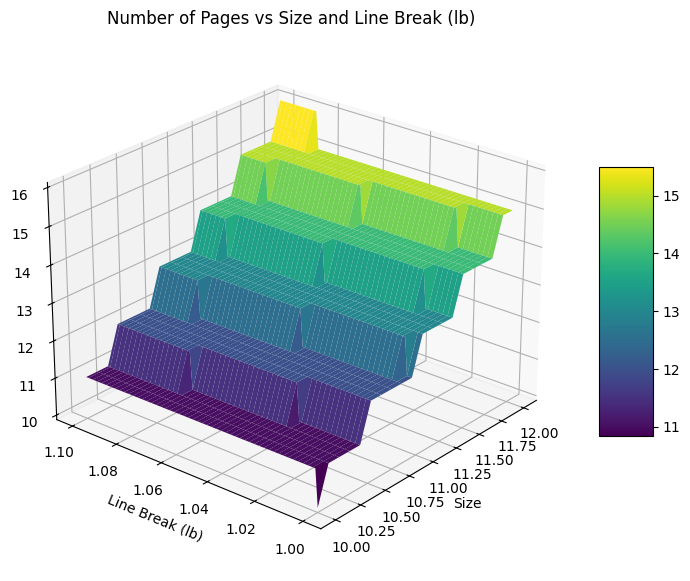

In [24]:
size_values = np.linspace(10, 12, 20)
lb_values = np.linspace(1, 1.1, 100)
size_mesh, lb_mesh = np.meshgrid(size_values, lb_values)

no_pages_values = no_pages(size_mesh, lb_mesh)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(size_mesh, lb_mesh, no_pages_values, cmap='viridis')

ax.set_xlabel('Size')
ax.set_ylabel('Line Break (lb)')
ax.set_zlabel('Number of Pages')
ax.set_title('Number of Pages vs Size and Line Break (lb)')

ax.view_init(elev=25, azim=220)

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()